# Introduction

This set of data is a record of resutaurants and places that serves food in the state of Alaska.To make it more engaging, we will start by looking at the state of Alaska and its tourists attractions. 


Alaska has gorgous nature ,Anchorage is the gateway to Alaska adventure. Located within Denaʼina Ełnena, on the traditional homelands of the Dena’ina Athabascan people and the Native Village of Eklutna, the city combines wild Alaska beauty, convenient urban comforts, mesmerizing outdoor spaces, and captivating arts and culture. Find sparkling glaciers, abundant wildlife, vast parks and trails, and dazzling northern lights. A trip to Anchorage opens doors to the best of Alaska, all in one place. In every state , there are places where people look to drink and eat. The popularity of resturant is based on the quality of the place and the food.

The purpose of this analysis is to do a detailed data analysis to predict that if a resturaunt pass its inspection it would have a much better quality in terms of serving its customers which leads to better rating on the online rating platforms such as yelp.

In this dataset, there are 14 different attributes:

1. business_id : alphanumerical string

2. business_name : alphanumberical string

3. business_address	: alphanumerical string 

4. business_city: alphabetical string	

5. business_state : alphabetical string

6. business_postal_code: integer

7. business_phone_number: double

8. inspection_date: string( mm/dd/yyyy)

9. inspection_score	: double
        Health inspection scores are rated on a point system from 1 to 100. Scores are deducted based on violations found by health inspectors on everything from food storage and cooking temperatures to hand washing. Scores below 80 result in a near-term re-inspection or possible closure. Scores below 70 result in an automatic temporary closure until the violations are corrected.
        https://www.adn.com/culture/food-drink/2016/06/20/looking-for-anchorage-restaurant-health-inspection-scores-just-yelp-it/

10. inspection_description	: string

11. inspection_type	: string

12. violation_description	: string

13. violation_code	: integer

14. business_location: string

The name convension of these attributes are self explanatory and there is no need of providing definition of the terms. 

In [129]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



dataframe=pd.read_csv("https://raw.githubusercontent.com/mpaydar/Restaurant_and_food_inspection_dataset/main/restaurant-and-food-inspections-1.csv")
dataframe.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_phone_number,inspection_date,inspection_score,inspection_description,inspection_type,violation_description,violation_code,business_location
0,FA0005362 (https://anchorageonline.envisioncon...,MCGINLEYS PUB,645 G ST,ANCHORAGE,AK,99501,9.072792e+09,3/7/2017,94.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,"HANDWASHING FACILITIES SUPPLIED, ACCESSIBLE",8,"645 G ST\nANCHORAGE, AK 99501\n(61.2157799112,..."
1,FA0000274 (https://anchorageonline.envisioncon...,VILLAGE INN #1,1130 E NORTHERN LIGHTS BLVD,ANCHORAGE,AK,995084219,9.072796e+09,10/21/2015,86.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,DEMONSTRATION OF KNOWLEDGE,1,"1130 E NORTHERN LIGHTS BLVD\nANCHORAGE, AK 995..."
2,FA0007874 (https://anchorageonline.envisioncon...,RONNIE SUSHI 2,924 MULDOON RD,ANCHORAGE,AK,99504,9.073380e+09,11/22/2016,80.0,ENFORCEMENT INSPECTION REQUIRED,Regular,THERMOMETERS PROVIDED AND ACCURATE,34,"924 MULDOON RD\nANCHORAGE, AK 99504\n(61.21387..."
3,FA0001485 (https://anchorageonline.envisioncon...,FRED MEYER - RETAIL FISH,1000 E NORTHERN LIGHTS BLVD,ANCHORAGE,AK,99503,NaN,12/23/2003,96.0,NO ACTION,Regular,NaN,NaN,"1000 E NORTHERN LIGHTS BLVD\nANCHORAGE, AK 995..."
4,FA0009047 (https://anchorageonline.envisioncon...,PHO GRILL,8809 JEWEL LAKE RD,ANCHORAGE,AK,99502,9.078682e+09,7/13/2017,83.0,ENFORCEMENT INSPECTION REQUIRED,Regular,BARE HAND CONTACT WITH READY TO EAT FOOD,7,"8809 JEWEL LAKE RD\nANCHORAGE, AK 99502\n(61.1..."


In [75]:
dataframe.shape

(45006, 14)

 There are 45,006 rows in this dataset.  

# Data Cleaning and Exploring the Data

In this analysis, we won't need business_id, business_address,business_phone_number,and business location so we will drop them to  prepare the more appropriate for the our purpose. 

## Dropping the unneccessary columns

In [76]:
dataframe=dataframe.drop(['business_phone_number','business_id','business_address','business_phone_number',"business_location"],axis=1)
dataframe.head()

,business_name,business_city,business_state,business_postal_code,inspection_date,inspection_score,inspection_description,inspection_type,violation_description,violation_code
0,MCGINLEYS PUB,ANCHORAGE,AK,99501,3/7/2017,94.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,"HANDWASHING FACILITIES SUPPLIED, ACCESSIBLE",8
1,VILLAGE INN #1,ANCHORAGE,AK,995084219,10/21/2015,86.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,DEMONSTRATION OF KNOWLEDGE,1
2,RONNIE SUSHI 2,ANCHORAGE,AK,99504,11/22/2016,80.0,ENFORCEMENT INSPECTION REQUIRED,Regular,THERMOMETERS PROVIDED AND ACCURATE,34
3,FRED MEYER - RETAIL FISH,ANCHORAGE,AK,99503,12/23/2003,96.0,NO ACTION,Regular,NaN,NaN
4,PHO GRILL,ANCHORAGE,AK,99502,7/13/2017,83.0,ENFORCEMENT INSPECTION REQUIRED,Regular,BARE HAND CONTACT WITH READY TO EAT FOOD,7


The job is done and now we have eliminated the fields we won't be working in our analysis. Now, let's look at different data types in the dataset.

In [77]:


df_info = pd.DataFrame(dataframe.dtypes,columns=['Dtype'])
df_info['Nunique'] = dataframe.nunique()
df_info['MissingValues']=dataframe.isnull().sum()
df_info['Count']=dataframe.count()
df_info['ZeroValues']=(dataframe==0).sum()
df_info['?']=(dataframe=='?').sum()
df_info

,Dtype,Nunique,MissingValues,Count,ZeroValues,?
business_name,object,1755,0,45006,0,0
business_city,object,10,0,45006,0,0
business_state,object,2,0,45006,0,0
business_postal_code,int64,52,0,45006,0,0
inspection_date,object,4483,0,45006,0,0
inspection_score,float64,33,17828,27178,0,0
inspection_description,object,13,0,45006,0,0
inspection_type,object,14,0,45006,0,0
violation_description,object,176,14491,30515,0,0
violation_code,object,99,14490,30516,0,0


The first thing that stands out from this table is the number of states which suppose to be only Alaska however we see two.
The second fact that is prominant in the table is the number of missing values for inspection score(17,828),violation_description(14491),violation_code(14490). 

It is important to note that this data is from the Alaska inspection records, and any other enteries could be interpreted as invalid enteries, so we have to eliminate those invalid enteries to prepare the data further.Since all the data is for one state it won't provide any useful insights , so we can drop the entire state column. 

## Dropping the state column 

In [130]:
dataframe=dataframe.drop("business_state",axis=1)
dataframe.head()

,business_id,business_name,business_address,business_city,business_postal_code,business_phone_number,inspection_date,inspection_score,inspection_description,inspection_type,violation_description,violation_code,business_location
0,FA0005362 (https://anchorageonline.envisioncon...,MCGINLEYS PUB,645 G ST,ANCHORAGE,99501,9.072792e+09,3/7/2017,94.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,"HANDWASHING FACILITIES SUPPLIED, ACCESSIBLE",8,"645 G ST\nANCHORAGE, AK 99501\n(61.2157799112,..."
1,FA0000274 (https://anchorageonline.envisioncon...,VILLAGE INN #1,1130 E NORTHERN LIGHTS BLVD,ANCHORAGE,995084219,9.072796e+09,10/21/2015,86.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,DEMONSTRATION OF KNOWLEDGE,1,"1130 E NORTHERN LIGHTS BLVD\nANCHORAGE, AK 995..."
2,FA0007874 (https://anchorageonline.envisioncon...,RONNIE SUSHI 2,924 MULDOON RD,ANCHORAGE,99504,9.073380e+09,11/22/2016,80.0,ENFORCEMENT INSPECTION REQUIRED,Regular,THERMOMETERS PROVIDED AND ACCURATE,34,"924 MULDOON RD\nANCHORAGE, AK 99504\n(61.21387..."
3,FA0001485 (https://anchorageonline.envisioncon...,FRED MEYER - RETAIL FISH,1000 E NORTHERN LIGHTS BLVD,ANCHORAGE,99503,NaN,12/23/2003,96.0,NO ACTION,Regular,NaN,NaN,"1000 E NORTHERN LIGHTS BLVD\nANCHORAGE, AK 995..."
4,FA0009047 (https://anchorageonline.envisioncon...,PHO GRILL,8809 JEWEL LAKE RD,ANCHORAGE,99502,9.078682e+09,7/13/2017,83.0,ENFORCEMENT INSPECTION REQUIRED,Regular,BARE HAND CONTACT WITH READY TO EAT FOOD,7,"8809 JEWEL LAKE RD\nANCHORAGE, AK 99502\n(61.1..."


## Visualizing of the missing values observation within dataset

<AxesSubplot:>

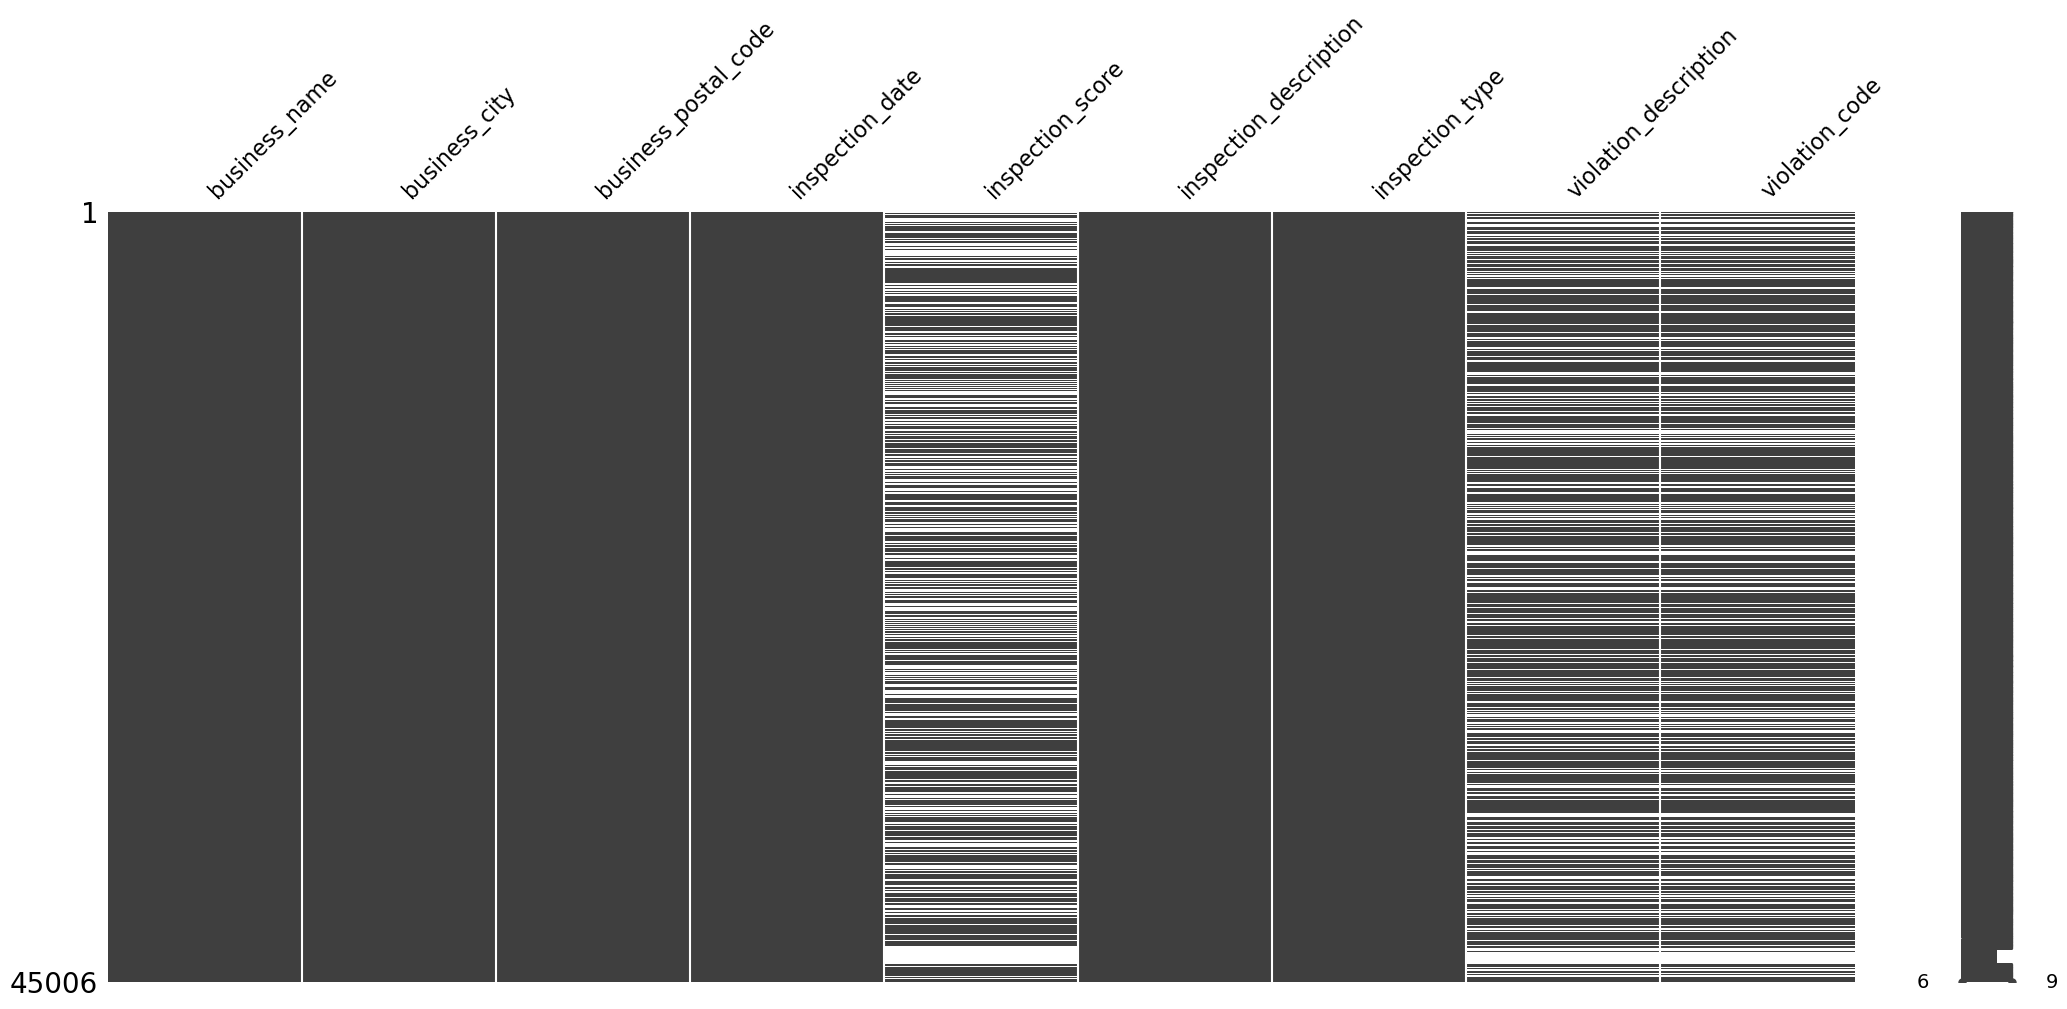

In [79]:
msno.matrix(dataframe)

Since we have so many missing values for inspection_score, violation description and violation code it must be handle to aviod any complications further down the analysis. To resolve this issue, we will be dropping all NA values in the dataset.

## Dropping N/A values

In [80]:
dataframe=dataframe.dropna()

## Visualizing the dataset after dropna resolution

<AxesSubplot:>

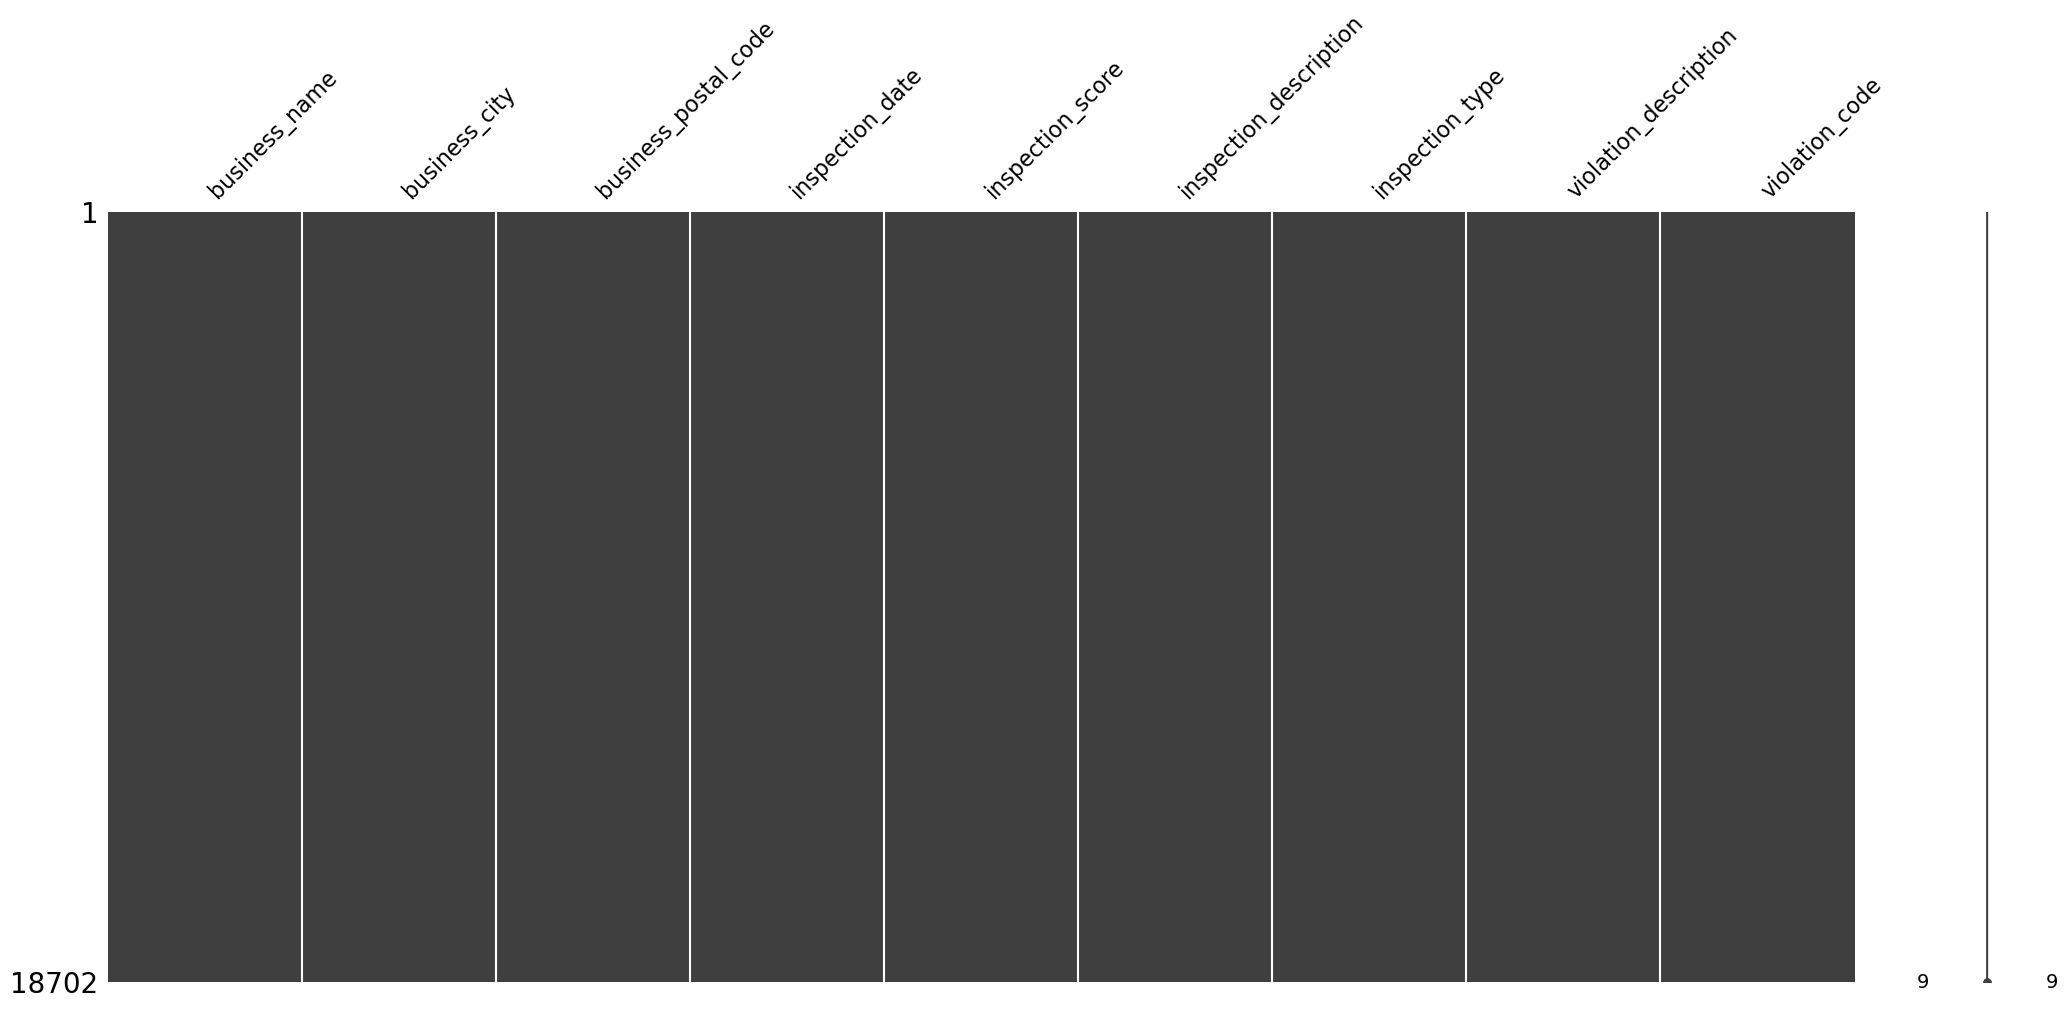

In [81]:
msno.matrix(dataframe)

The msno matrix shows each attributes and whether there are any missing values within in rows. It looks good as we have removed all the missing values. 

Now let's look at each column closely. The first column that could give us a very interesting insight about the data would be the business_city.

In [82]:
t=dataframe.business_city.value_counts()
t=pd.DataFrame(t)
t.rename(columns={'business_city':'City Frequency'},inplace=True)
t

,City Frequency
ANCHORAGE,16893
EAGLE RIVER,1213
CHUGIAK,332
GIRDWOOD,220
INDIAN,33
FT RICHARDSON,6
PORTAGE,4
WASILLA,1


Looking at the table above, we see ANCHORAGE leading by far. It is not strange that most places would be in this city because according to an online article ANCHORAGE has 40% of Alaska population. The next city is Eagle River which is right by ANCHORAGE. A lot of places who work in ANCHORAGE actually live in Eagle River so that's why it has more resturants than the other cities. For the purpose of this analyis we will be looking at the Top 4 cities.

## Top 4 Cities - ANCHORAGE,Eagle River, CHUGIAK,GIRDWOOD

[Text(0.5, 0, 'City'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'City vs. Frequency')]

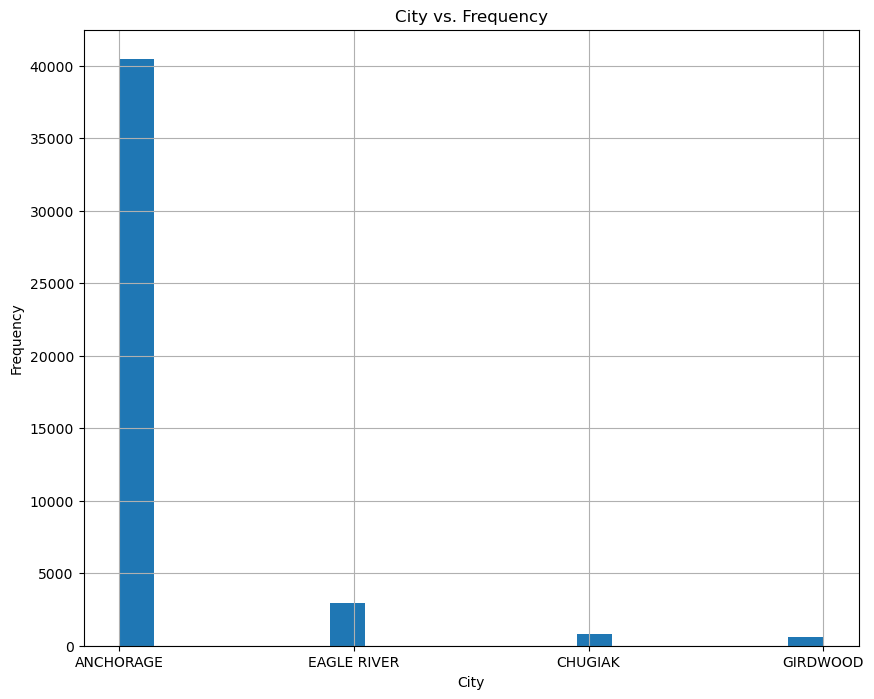

In [133]:
dataframe=dataframe.loc[(dataframe.business_city == "ANCHORAGE") | (dataframe.business_city == "EAGLE RIVER" )| (dataframe.business_city == "CHUGIAK") | (dataframe.business_city == "GIRDWOOD")]
dataframe.business_city.value_counts()
x2=dataframe.business_city.hist(bins=20,figsize=(10,8))
# x2.xlabel("Frequency")
# plt.xlabel("City")
# plt.title("Frequency / City")
x2.set(xlabel='City', ylabel='Frequency',title="City vs. Frequency")



The histogram above reflect to the fact that the majority of the records in the dataset is from the city of ANCHORAGE which is the center of urban activities in Alaska. 

Now let's look at the "inspection_date" column. The first thing that comes to mind is that the month or the day is not so much important. We just want to see how recents are these records. The format of the date is MM/DD/YYYY and we are only interested in the YYYY portion of the date string. Let's do some code to make the date looks appropriate for our purpose.

In [134]:
import re

inspect_dataList=dataframe.inspection_date.tolist()
mylist=[]
for i in inspect_dataList:
    yyyy=re.findall(r"\d{4}",i)
    mylist+=yyyy
dataframe.inspection_date=mylist
dataframe
b=dataframe.inspection_date
pd.DataFrame(b)
dataframe.replace(to_replace='\d{1,2}/\d{1,2}/\d{4}', value=r'^ba.$',regex=True)


,business_id,business_name,business_address,business_city,business_postal_code,business_phone_number,inspection_date,inspection_score,inspection_description,inspection_type,violation_description,violation_code,business_location
0,FA0005362 (https://anchorageonline.envisioncon...,MCGINLEYS PUB,645 G ST,ANCHORAGE,99501,9.072792e+09,2017,94.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,"HANDWASHING FACILITIES SUPPLIED, ACCESSIBLE",8,"645 G ST\nANCHORAGE, AK 99501\n(61.2157799112,..."
1,FA0000274 (https://anchorageonline.envisioncon...,VILLAGE INN #1,1130 E NORTHERN LIGHTS BLVD,ANCHORAGE,995084219,9.072796e+09,2015,86.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,DEMONSTRATION OF KNOWLEDGE,1,"1130 E NORTHERN LIGHTS BLVD\nANCHORAGE, AK 995..."
2,FA0007874 (https://anchorageonline.envisioncon...,RONNIE SUSHI 2,924 MULDOON RD,ANCHORAGE,99504,9.073380e+09,2016,80.0,ENFORCEMENT INSPECTION REQUIRED,Regular,THERMOMETERS PROVIDED AND ACCURATE,34,"924 MULDOON RD\nANCHORAGE, AK 99504\n(61.21387..."
3,FA0001485 (https://anchorageonline.envisioncon...,FRED MEYER - RETAIL FISH,1000 E NORTHERN LIGHTS BLVD,ANCHORAGE,99503,NaN,2003,96.0,NO ACTION,Regular,NaN,NaN,"1000 E NORTHERN LIGHTS BLVD\nANCHORAGE, AK 995..."
4,FA0009047 (https://anchorageonline.envisioncon...,PHO GRILL,8809 JEWEL LAKE RD,ANCHORAGE,99502,9.078682e+09,2017,83.0,ENFORCEMENT INSPECTION REQUIRED,Regular,BARE HAND CONTACT WITH READY TO EAT FOOD,7,"8809 JEWEL LAKE RD\nANCHORAGE, AK 99502\n(61.1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45001,FA0000261 (https://anchorageonline.envisioncon...,TWIN DRAGON,612 E 15TH AVE,ANCHORAGE,995015307,9.072768e+09,2018,90.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,NONFOOD-CONTACT SURFACES CLEAN,47,"612 E 15TH AVE\nANCHORAGE, AK 995015307\n(61.2..."
45002,FA0000261 (https://anchorageonline.envisioncon...,TWIN DRAGON,612 E 15TH AVE,ANCHORAGE,995015307,9.072768e+09,2018,90.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,"HANDWASHING FACILITIES SUPPLIED, ACCESSIBLE",8,"612 E 15TH AVE\nANCHORAGE, AK 995015307\n(61.2..."
45003,FA0000261 (https://anchorageonline.envisioncon...,TWIN DRAGON,612 E 15TH AVE,ANCHORAGE,995015307,9.072768e+09,2018,NaN,NO ACTION,Complaint,"PROPER COOLING METHODS, ADEQUATE EQUIPMENT",31,"612 E 15TH AVE\nANCHORAGE, AK 995015307\n(61.2..."
45004,FA0000261 (https://anchorageonline.envisioncon...,TWIN DRAGON,612 E 15TH AVE,ANCHORAGE,995015307,9.072768e+09,2018,NaN,NO ACTION,Complaint,PROPER HOT HOLDING TEMPERATURES,19,"612 E 15TH AVE\nANCHORAGE, AK 995015307\n(61.2..."


The job is done as you can see , the inspection date is in the desire format of yyyy. Now,we can look at the date more closer to have more insight of how recents are the inspection record.

In [ ]:
year_table=b.value_counts()
yearFrequency=pd.DataFrame(year_table)
yearFrequency.rename(columns={'inspection_date':'inspection frequency/year'},inplace=True)
yearFrequency

## Which year has the most inspection frequency?

In [ ]:
violationFrequency=dataframe.violation_code.value_counts()
violationFrame=pd.DataFrame(violationFrequency)
# x2=violationFrame['violation_code'].tolist()
x2=dataframe.inspection_date
dataframe['inspection_date']=x2.astype('int64')

x_value=x2.value_counts()
sns.histplot(dataframe['inspection_date'], kde =True,fill=False,bins=15).set_title("Histogram of inspection date")
plt.xlabel="year of inspctions"

The highest frequency is for the year 2016-2017 as it shown by the histogram.The lowest frequnecy is from 2002.There could be many different reasons to explain higher frequency of 2016-2017 such higher food poisoning in that year, or other health concern matter in that year  which need further research. 

## The highest ,lowest score, and average score

<AxesSubplot:ylabel='inspection_score'>

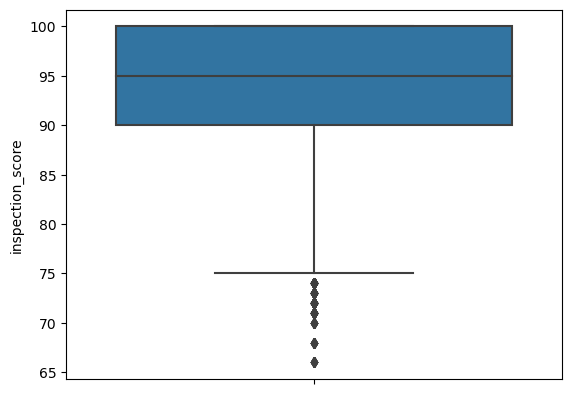

In [135]:
sns.boxplot(y=dataframe.inspection_score)

The median score is 95 which could be interpreted as amazing resturaunt experience on average in Alaska. There are some outlier that lies below the lower whisker which is on the 75 socre. We will look which cities this poor resturant are located and try to investigate the reasoning on them. In addition from the boxplot, we don't see any abnormalities.  

## Looking at the resturant lower between 65-75, Identify the location and violation code

In [136]:
dataframe_copy=dataframe[dataframe['inspection_score']<75]
outlier_table=dataframe_copy['inspection_score'].value_counts()
outlier_frame=pd.DataFrame(outlier_table)
outlier_frame

,inspection_score
72.0,64
74.0,54
73.0,50
71.0,49
70.0,11
68.0,11
66.0,10


The reason that we just looked at the score less than 75 and we did not put extra condition to check for score bigger than 65 is that the box plot clearly shows there is nothing that fall below 65, so as long as it is smaller than 75 we are looking at the correct set of data. 
Let's get closer and look at the cities that host most of these poor quality resturants.

## Cities with most poor conditions

<AxesSubplot:ylabel='business_city'>

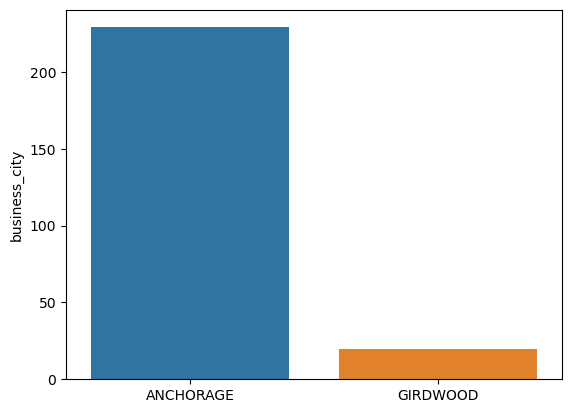

In [137]:
y_value=dataframe_copy.business_city.value_counts()
x_value=dataframe_copy.business_city.unique()

sns.barplot(x=x_value,y=y_value)

Majority of poor quality resturaunts are within the city of ANCHORAGE. However, it is important to note that this fact could be misleading because ANCHORAGE has so much resutaurants than any other cities in Alaska and if we want to have a better picture of resturant qualities within the city of ANCHORAGE , we could look at these resturant in a closer scale.

To do so, I propose to divide the resturaunt within the city of ANCHORAGE into 3 parts and do a comparasive analysis between each part. I will divide the resturaunts in 3 parts:


65-75 - poor resturaunts(0)
75-85 - average resturaunts(1)
85-100- Excellent resturaunts(2)

## Labeling the Resturaunts: bad,average,excellent

In [138]:
dataframe_addColumn=dataframe['inspection_score']
rating=dataframe_addColumn.tolist()
rating_label=[]
for i in rating:
    if i<75:
        rating_label.append("bad")
    elif 75<=i<85:
        rating_label.append("average")
    else:
        rating_label.append("Excellent")

dataframe['rating_label']=rating_label
dataframe=dataframe.dropna()
dataframe

,business_id,business_name,business_address,business_city,business_postal_code,business_phone_number,inspection_date,inspection_score,inspection_description,inspection_type,violation_description,violation_code,business_location,rating_label
0,FA0005362 (https://anchorageonline.envisioncon...,MCGINLEYS PUB,645 G ST,ANCHORAGE,99501,9.072792e+09,2017,94.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,"HANDWASHING FACILITIES SUPPLIED, ACCESSIBLE",8,"645 G ST\nANCHORAGE, AK 99501\n(61.2157799112,...",Excellent
1,FA0000274 (https://anchorageonline.envisioncon...,VILLAGE INN #1,1130 E NORTHERN LIGHTS BLVD,ANCHORAGE,995084219,9.072796e+09,2015,86.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,DEMONSTRATION OF KNOWLEDGE,1,"1130 E NORTHERN LIGHTS BLVD\nANCHORAGE, AK 995...",Excellent
2,FA0007874 (https://anchorageonline.envisioncon...,RONNIE SUSHI 2,924 MULDOON RD,ANCHORAGE,99504,9.073380e+09,2016,80.0,ENFORCEMENT INSPECTION REQUIRED,Regular,THERMOMETERS PROVIDED AND ACCURATE,34,"924 MULDOON RD\nANCHORAGE, AK 99504\n(61.21387...",average
4,FA0009047 (https://anchorageonline.envisioncon...,PHO GRILL,8809 JEWEL LAKE RD,ANCHORAGE,99502,9.078682e+09,2017,83.0,ENFORCEMENT INSPECTION REQUIRED,Regular,BARE HAND CONTACT WITH READY TO EAT FOOD,7,"8809 JEWEL LAKE RD\nANCHORAGE, AK 99502\n(61.1...",average
5,FA0003387 (https://anchorageonline.envisioncon...,TACO KING #2,1330 E HUFFMAN RD,ANCHORAGE,99515,9.073447e+09,2008,95.0,NO ACTION,Regular,"12 HANDS CLEAN, GOOD HYGIENE, CERTIFICATION",12,"1330 E HUFFMAN RD\nANCHORAGE, AK 99515\n(61.10...",Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44998,FA0000261 (https://anchorageonline.envisioncon...,TWIN DRAGON,612 E 15TH AVE,ANCHORAGE,995015307,9.072768e+09,2018,90.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,"FOOD PROPERLY LABELED, ORIGINAL CONTAINER",35,"612 E 15TH AVE\nANCHORAGE, AK 995015307\n(61.2...",Excellent
44999,FA0000261 (https://anchorageonline.envisioncon...,TWIN DRAGON,612 E 15TH AVE,ANCHORAGE,995015307,9.072768e+09,2018,90.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,"PROPER COOLING METHODS, ADEQUATE EQUIPMENT",31,"612 E 15TH AVE\nANCHORAGE, AK 995015307\n(61.2...",Excellent
45000,FA0000261 (https://anchorageonline.envisioncon...,TWIN DRAGON,612 E 15TH AVE,ANCHORAGE,995015307,9.072768e+09,2018,90.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,"TOILET FACILITIES CONSTRUCTED, SUPPLIED, CLEANED",51,"612 E 15TH AVE\nANCHORAGE, AK 995015307\n(61.2...",Excellent
45001,FA0000261 (https://anchorageonline.envisioncon...,TWIN DRAGON,612 E 15TH AVE,ANCHORAGE,995015307,9.072768e+09,2018,90.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,NONFOOD-CONTACT SURFACES CLEAN,47,"612 E 15TH AVE\nANCHORAGE, AK 995015307\n(61.2...",Excellent


## percentage of bad,average,excellent in the city of ANCHORAGE

[Text(0.5, 0, 'Resturaunts Rating-Type'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Rating vs. Frequency (City of ANCHORAGE)')]

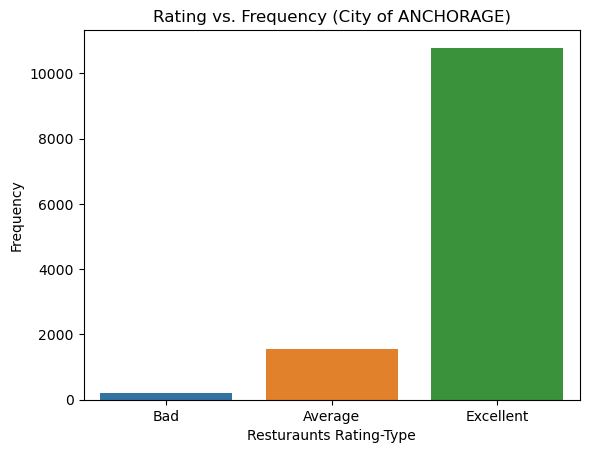

In [139]:
AnchorageDataFrame=dataframe.loc[dataframe.business_city == "ANCHORAGE"]
Anchorage_BadResturaunts=AnchorageDataFrame[AnchorageDataFrame.rating_label == 'bad']
Anchorage_AverageResturaunts=AnchorageDataFrame[AnchorageDataFrame.rating_label == 'average']
Anchorage_ExcellentResturaunts=AnchorageDataFrame[AnchorageDataFrame.rating_label == 'Excellent']

bad=Anchorage_BadResturaunts.rating_label.value_counts().tolist()
ave=Anchorage_AverageResturaunts.rating_label.value_counts().tolist()
excellent=Anchorage_ExcellentResturaunts.rating_label.value_counts().tolist()

combination_list=[bad[0],ave[0],excellent[0]]

y_values=[combination_list[0],combination_list[1],combination_list[2]]
x_values=["Bad","Average","Excellent"]

axis=sns.barplot(x=x_values,y=y_values)
axis.set(xlabel='Resturaunts Rating-Type', ylabel='Frequency',title="Rating vs. Frequency (City of ANCHORAGE)")


As it has been shown in the bar graph there are more numbers of Excellent Rating resturaunts in the ANCHORAGE city. Even though the comparison of the rating between different cities showed the delusion that ANCHORAGE cities have a lot of bad resturaunts. However, when insepcting closely we see more clear picture of the story. 